# Assignment 3

Matrikelnr.: 2089929

## Imports

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

## Überblick und Vorbereitung der Daten

In [82]:
df_social = pd.read_csv('03_Clustering_Marketing.csv',delimiter=';')

Der Datensatz umfasst 15.000 Zeilen und 40 Spalten. Er enthält eine Mischung aus numerischen und kategorialen Variablen, darunter das Abschlussjahr (gradyear), Geschlecht (gender), Alter (age), die Anzahl der Freunde (NumberOffriends) sowie eine Vielzahl von Angaben zu Interessen und Aktivitäten wie Basketball, Fußball, Schwimmen und persönliche Vorlieben wie Musik und Einkaufen.

Die Abschlussjahre im Datensatz reichen von 2006 bis 2009. Das Alter der Personen variiert, wobei einige Werte fehlen. Die Anzahl der Freunde pro Person reicht von 0 bis 605, mit einem Durchschnittswert von etwa 30 Freunden. Neben diesen demografischen Informationen enthält der Datensatz Angaben zu verschiedenen Aktivitäten und Vorlieben in Form von booleschen Werten.

### Datentypen berichtigen

In [83]:
df_social['age'] = pd.to_numeric(df_social['age'], errors='coerce')

### Nullwerte entfernen

In [84]:
df_social = df_social.dropna()

### Feature Extraction

<Axes: xlabel='age', ylabel='Count'>

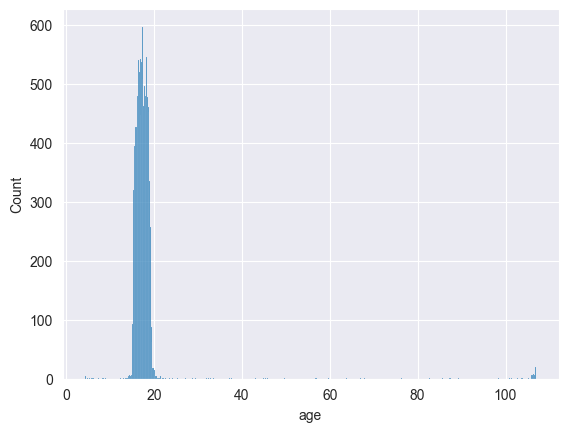

In [85]:
sns.histplot(df_social['age'])

Durch die Verwendung von float als Datentyp der Spalte Alter sehen wir extrem viele Dimensionen. Aus diesem Grund reduzieren wir die Dimensionen, indem wir Altersklassen definieren und in Bins zusammenfassen. Wir sehen außerdem eine Häufung im Altersbereich von 10 bis 20 Jahren. Deshalb definieren wir die Bins hier etwas feiner.

<Axes: xlabel='age', ylabel='Count'>

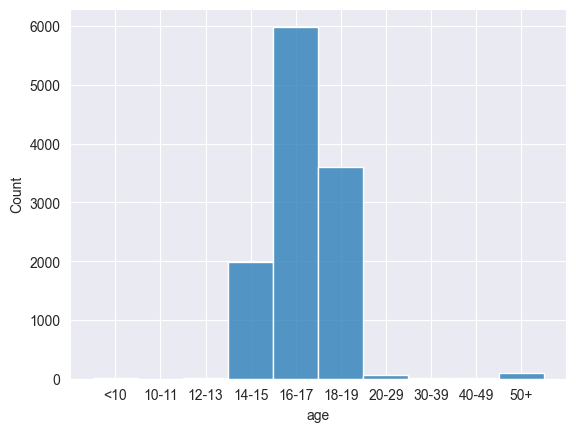

In [86]:
# Altersklassen definieren
bins = [0, 10, 12, 14, 16, 18, 20, 30, 40, 50, np.inf]
labels = ['<10', '10-11', '12-13', '14-15', '16-17', '18-19', '20-29', '30-39', '40-49', '50+']

# Bins erstellen
df_social['age'] = pd.cut(df_social['age'], bins=bins, labels=labels, right=False)
sns.histplot(df_social['age'])

<Axes: xlabel='NumberOffriends', ylabel='Count'>

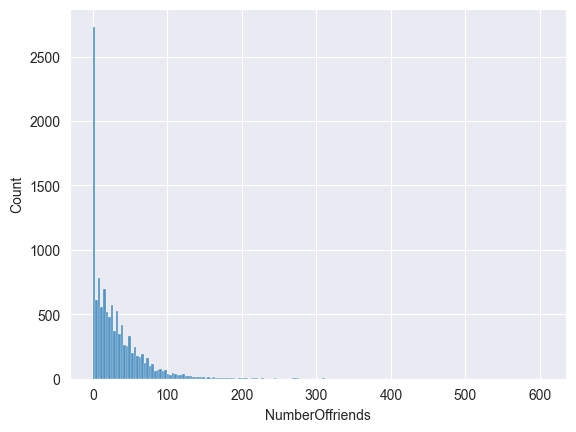

In [87]:
sns.histplot(df_social['NumberOffriends'])

Eine ähnliche Problematik sehen wir auch bei der Anzahl der Freunden, weshalb wir hier auch eine Dimensionsreduktion durchführen.

In [88]:
# Bins definieren für Anzahl an Freunden
bins_friends = [0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
labels_friends = ['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100','100+']

# Bins erstellen
df_social['NumberOffriends'] = pd.cut(df_social['NumberOffriends'], bins=bins_friends, labels=labels_friends, right=False)

<Axes: xlabel='NumberOffriends', ylabel='Count'>

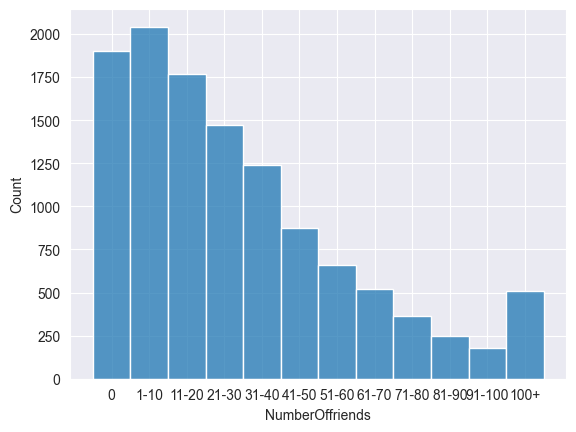

In [89]:
sns.histplot(df_social['NumberOffriends'])

### Prüfen von Ungleichgewichten

<Axes: xlabel='gender', ylabel='Count'>

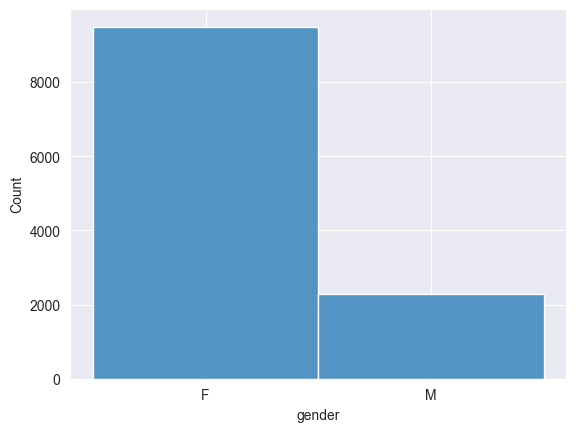

In [90]:
sns.histplot(df_social['gender'])

Wir sehen ein starkes Ungleichgewicht in Richtung des weiblichen Geschlechts, diesem werden wir uns später widmen.

### Encoding

In [92]:
# Nicht-numerische Spalten identifizieren
non_numeric_columns = df_social.select_dtypes(include=['object']).columns

# Alle nicht-numerischen Spalten encoden
for col in non_numeric_columns:
    unique_values = df_social[col].unique()
    df_social[col] = df_social[col].replace(to_replace=unique_values, value=list(range(len(unique_values))))
    
df_social.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,2007,0,16-17,41-50,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,0,16-17,41-50,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,2008,0,16-17,1-10,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
5,2008,1,18-19,31-40,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,1,18-19,11-20,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
